# Lab 3

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [5]:
dir()

['In',
 'MS',
 'Out',
 'VIF',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'load_data',
 'np',
 'open',
 'pd',
 'poly',
 'quit',
 'sm',
 'subplots',
 'summarize']

In [6]:
A = np.array([3, 5, 11])
dir(A)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

In [10]:
A.take(1)

5

## 3.1 Simple Linear Regression

In [11]:
Boston = load_data("Boston")

In [12]:
type(Boston)

pandas.core.frame.DataFrame

In [13]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [15]:
X = pd.DataFrame(
    {'intercept': np.ones(Boston.shape[0]), 
     'lstat': Boston['lstat']}
)

In [18]:
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [22]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [23]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [29]:
design = MS(['lstat'])
dir(design)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'build_sequence',
 'build_submodel',
 'categorical_features',
 'default_encoders',
 'fit',
 'fit_transform',
 'get_metadata_routing',
 'get_params',
 'intercept',
 'names',
 'set_output',
 'set_params',
 'terms',
 'transform']

In [32]:
design.fit(Boston)

ModelSpec(terms=['lstat'])

In [33]:
X = design.transform(Boston)

In [34]:
X

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94
4,1.0,5.33
...,...,...
501,1.0,9.67
502,1.0,9.08
503,1.0,5.64
504,1.0,6.48


In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           5.08e-88
Time:                        17:25:39   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [39]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [40]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [43]:
#95% confidence interval
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [44]:
#95% prediction interval
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [45]:
new_predictions

In [50]:
def abline(ax, b, m, *args, **kwargs):
    """
    m: slop
    b: intercept
    """
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    print('xlim', xlim)
    print('ylim', ylim)
    ax.plot(xlim, ylim, *args, **kwargs)

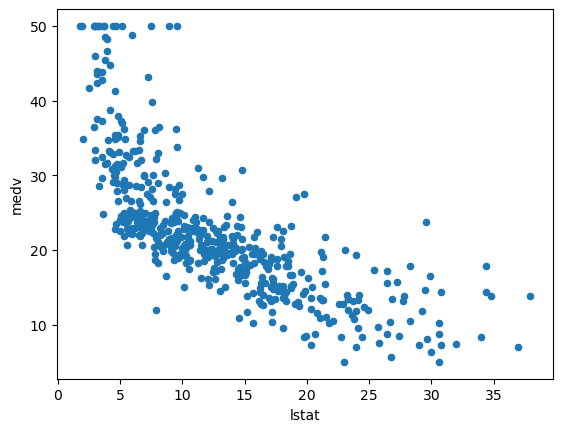

In [48]:
ax = Boston.plot.scatter('lstat', 'medv')

xlim (-0.0820000000000003, 39.782)
ylim [34.63174492639124, -3.2410225118172704]


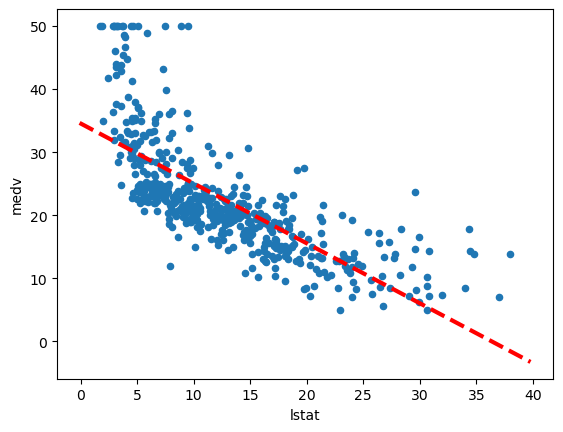

In [53]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

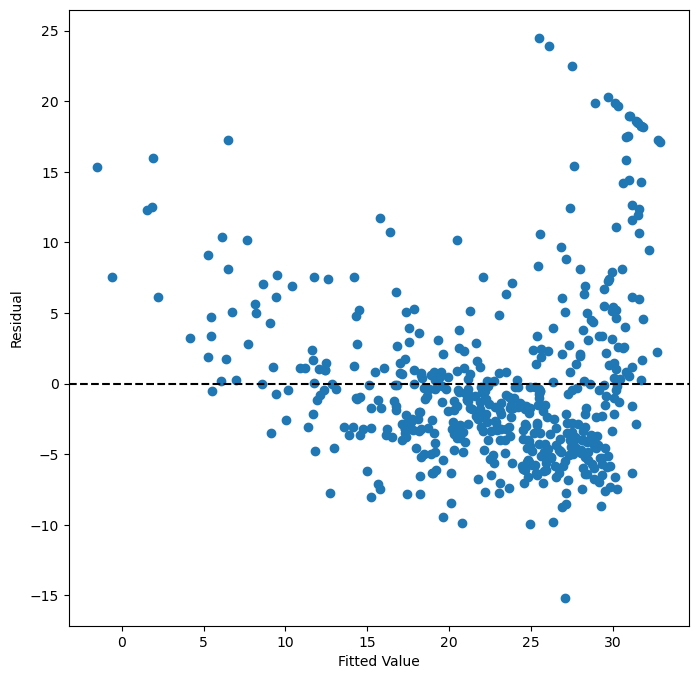

In [63]:
ax = subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

- The residual is not Guassian distributed
- Non-linearity exists

374

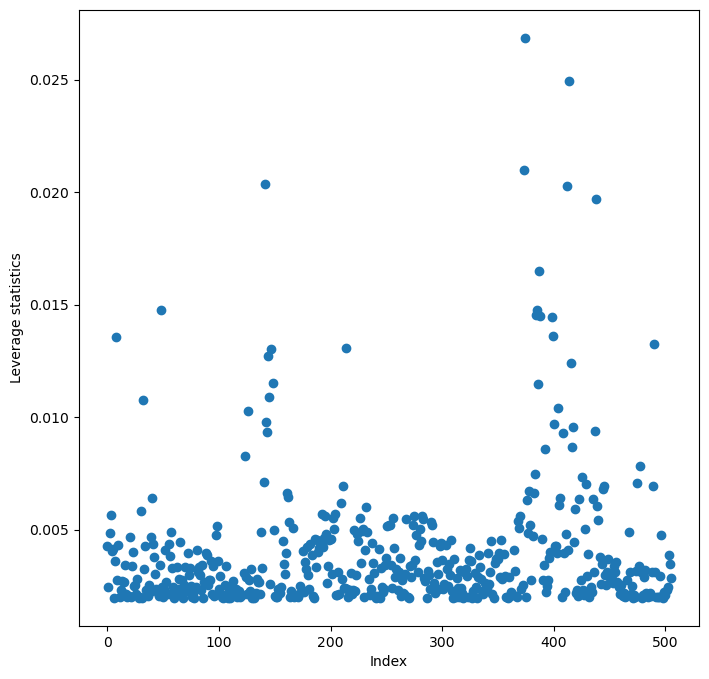

In [75]:
infl = results.get_influence()
ax = subplots(figsize=(8, 8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage statistics')
np.argmax(infl.hat_matrix_diag)

In [78]:
#hat_matrix_diag returns the leverage statistics
# h = 1/n + (x_i-x_bar)^2 / sum((x_i - x_bar) ^ 2)
# sum(h) = 2
sum(infl.hat_matrix_diag)
# In this example, X[374] is the highest leverage point

1.9999999999999991

In [80]:
sum(infl.cov_ratio)

508.01640697772655

## Multiple Linear Regression

In [82]:
X = MS(['lstat', 'age']).fit_transform(Boston)
X

,intercept,lstat,age
0,1.0,4.98,65.2
1,1.0,9.14,78.9
2,1.0,4.03,61.1
3,1.0,2.94,45.8
4,1.0,5.33,54.2
...,...,...,...
501,1.0,9.67,69.1
502,1.0,9.08,76.7
503,1.0,5.64,91.0
504,1.0,6.48,89.3


In [83]:
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [84]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [86]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [87]:
minus_age = Boston.columns.drop(['medv', 'age'])
X = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, X)
results = model1.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [88]:
results.rsquared

0.7342674984601643

In [89]:
results.scale

22.977951492202063

### 3.2.1 VIF

In [93]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

,vif
crim,1.767455
zn,2.265259
indus,3.987176
chas,1.068018
nox,4.070020
rm,1.834792
dis,3.613722
rad,7.396707
tax,8.994939
ptratio,1.785403


In [94]:
# Large VIF means collinearity
# VIF(beta_i) = 1 / (1 - R^2_x_i|x_-i)

### 3.2.2 Interaction terms

In [97]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
X

,intercept,lstat,age,lstat:age
0,1.0,4.98,65.2,324.696
1,1.0,9.14,78.9,721.146
2,1.0,4.03,61.1,246.233
3,1.0,2.94,45.8,134.652
4,1.0,5.33,54.2,288.886
...,...,...,...,...
501,1.0,9.67,69.1,668.197
502,1.0,9.08,76.7,696.436
503,1.0,5.64,91.0,513.240
504,1.0,6.48,89.3,578.664


In [98]:
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


### 3.2.3 Non-linear terms and transformation

In [101]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
X

,intercept,"poly(lstat, degree=2)[0]","poly(lstat, degree=2)[1]",age
0,1.0,-0.047815,0.038955,65.2
1,1.0,-0.021892,-0.010782,78.9
2,1.0,-0.053734,0.053604,61.1
3,1.0,-0.060527,0.071920,45.8
4,1.0,-0.045634,0.033866,54.2
...,...,...,...,...
501,1.0,-0.018589,-0.015433,69.1
502,1.0,-0.022265,-0.010231,76.7
503,1.0,-0.043702,0.029497,91.0
504,1.0,-0.038467,0.018316,89.3


In [106]:
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [107]:
# anova
from statsmodels.stats.anova import anova_lm
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


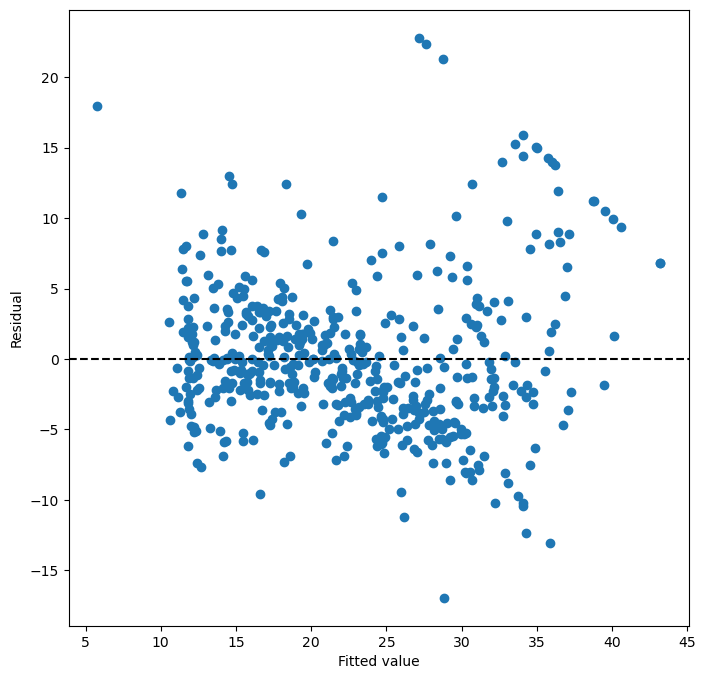

In [108]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

### Qualitative Predictors

In [112]:
Carseats = load_data('carseats')
print(Carseats.columns)
Carseats

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [130]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
# 2 interaction terms
final = allvars +[('Income', 'Advertising'), ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
X

,intercept,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Income:Advertising,Price:Age
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes,803.0,5040.0
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes,768.0,5395.0
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes,350.0,4720.0
3,1.0,117,100,4,466,97,Medium,55,14,Yes,Yes,400.0,5335.0
4,1.0,141,64,3,340,128,Bad,38,13,Yes,No,192.0,4864.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,Good,33,14,Yes,Yes,1836.0,4224.0
396,1.0,139,23,3,37,120,Medium,55,11,No,Yes,69.0,6600.0
397,1.0,162,26,12,368,159,Medium,40,18,Yes,Yes,312.0,6360.0
398,1.0,100,79,7,284,95,Bad,50,12,Yes,Yes,553.0,4750.0


In [131]:
X = pd.get_dummies(X, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)
X

,intercept,CompPrice,Income,Advertising,Population,Price,Age,Education,Income:Advertising,Price:Age,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1.0,138,73,11,276,120,42,17,803.0,5040.0,0,0,1,1
1,1.0,111,48,16,260,83,65,10,768.0,5395.0,1,0,1,1
2,1.0,113,35,10,269,80,59,12,350.0,4720.0,0,1,1,1
3,1.0,117,100,4,466,97,55,14,400.0,5335.0,0,1,1,1
4,1.0,141,64,3,340,128,38,13,192.0,4864.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,33,14,1836.0,4224.0,1,0,1,1
396,1.0,139,23,3,37,120,55,11,69.0,6600.0,0,1,0,1
397,1.0,162,26,12,368,159,40,18,312.0,6360.0,0,1,1,1
398,1.0,100,79,7,284,95,50,12,553.0,4750.0,0,0,1,1


In [132]:
model = sm.OLS(y, X)
result = model.fit()
summarize(result)

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
Income:Advertising,0.0008,0.000,2.698,0.007
Price:Age,0.0001,0.000,0.801,0.424


In [121]:
# Original code in the book
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

### Done